In [1]:
import seaborn as sns
import random
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

In [7]:
threshold = 14

In [39]:
count = 0
valid = []
to_plot = []
for i in range(0,100000) : 
    couple = np.random.normal(0,1,2)
    to_plot.append(couple)
    if np.absolute(couple[0]*couple[1]) <= 0.5 :
        count += 1
        valid.append(couple)

In [40]:
data_ok = pd.DataFrame(valid)
data_to_plot = pd.DataFrame(to_plot)

In [41]:
data_ok

,0,1
0,0.394441,0.996809
1,-0.571097,-0.536439
2,-1.267987,-0.137918
3,-0.464317,-0.021383
4,-0.055258,-0.022573
...,...,...
58845,-0.107587,1.635457
58846,0.353062,0.033016
58847,-0.528170,-0.507083
58848,1.760253,-0.134299


/tmp/ipykernel_276/1502271203.py:1: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(data_to_plot[0], data_to_plot[1], 'bo', color = 'blue', marker='.', markersize=5)
/tmp/ipykernel_276/1502271203.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(data_to_plot[0], data_to_plot[1], 'bo', color = 'blue', marker='.', markersize=5)
/tmp/ipykernel_276/1502271203.py:2: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(data_ok[0], data_ok[1],'bo', color = 'red',  marker='.', markersize=10)
/tmp/ipykernel_276/1502271203.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b

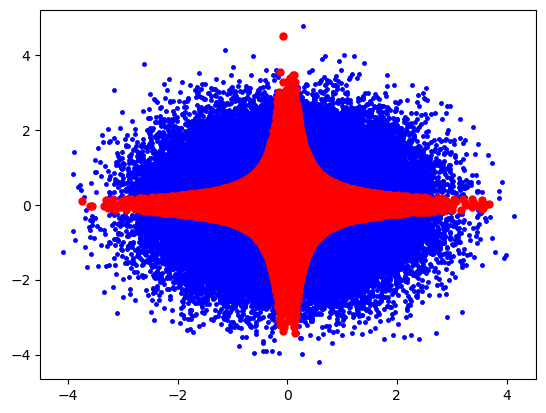

In [46]:
plt.plot(data_to_plot[0], data_to_plot[1], 'bo', color = 'blue', marker='.', markersize=5)
plt.plot(data_ok[0], data_ok[1],'bo', color = 'red',  marker='.', markersize=10)